<h3>Importing all the libraries</h3>
<p>Importing the necessary packages required for data preprocessing and plotting.</p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


import warnings
warnings.filterwarnings(action='ignore')

<h3>Creating the DataFrame</h3>

In [3]:
df = pd.read_csv("diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

<h3>Data metrics </h3>
<p> Quick check for the meta data and related information regarding the dataset </p>

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
desc = pd.DataFrame(df.describe())
desc

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head().T.style.set_properties(**{'background-color': 'pink',
                           'color': 'black',
                           'border-color': 'black'})

In [7]:
diabetes_df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)

<h3> Checking for Missing values</h3>
<p>Verify if our data set has potential missing values which will be need to be imputed for further computation.</p>
<p>Given the small amount of data values and the dataset was maintained by National Institute of Diabetes and Digestive and Kidney Diseases it didn't have outliers. </p>

In [113]:
#alternative Approach
# Count of missing values in each column
missing_values_count = diabetes_df.isnull().sum()
print(missing_values_count)

# Percentage of missing values in each column
missing_values_percent = diabetes_df.isnull().mean()
print(missing_values_percent)

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64
Pregnancies      0.0
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
DPF              0.0
Age              0.0
Outcome          0.0
dtype: float64


<h3>Check the distribution of target values</h3>
<p> Given, the higher percentage 0 zeroes there could be a possibilty of favoring zero while prediction</p>

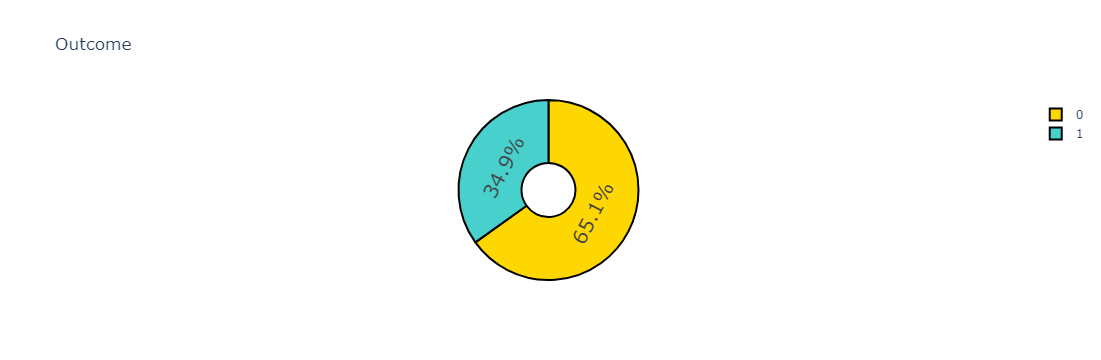

In [10]:
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = diabetes_df['Outcome'].value_counts()/diabetes_df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

<h3>Checking and removing the outliers</h3>
<p> Check whether the parameters are noramlly distributed or not in the dataset.</p>

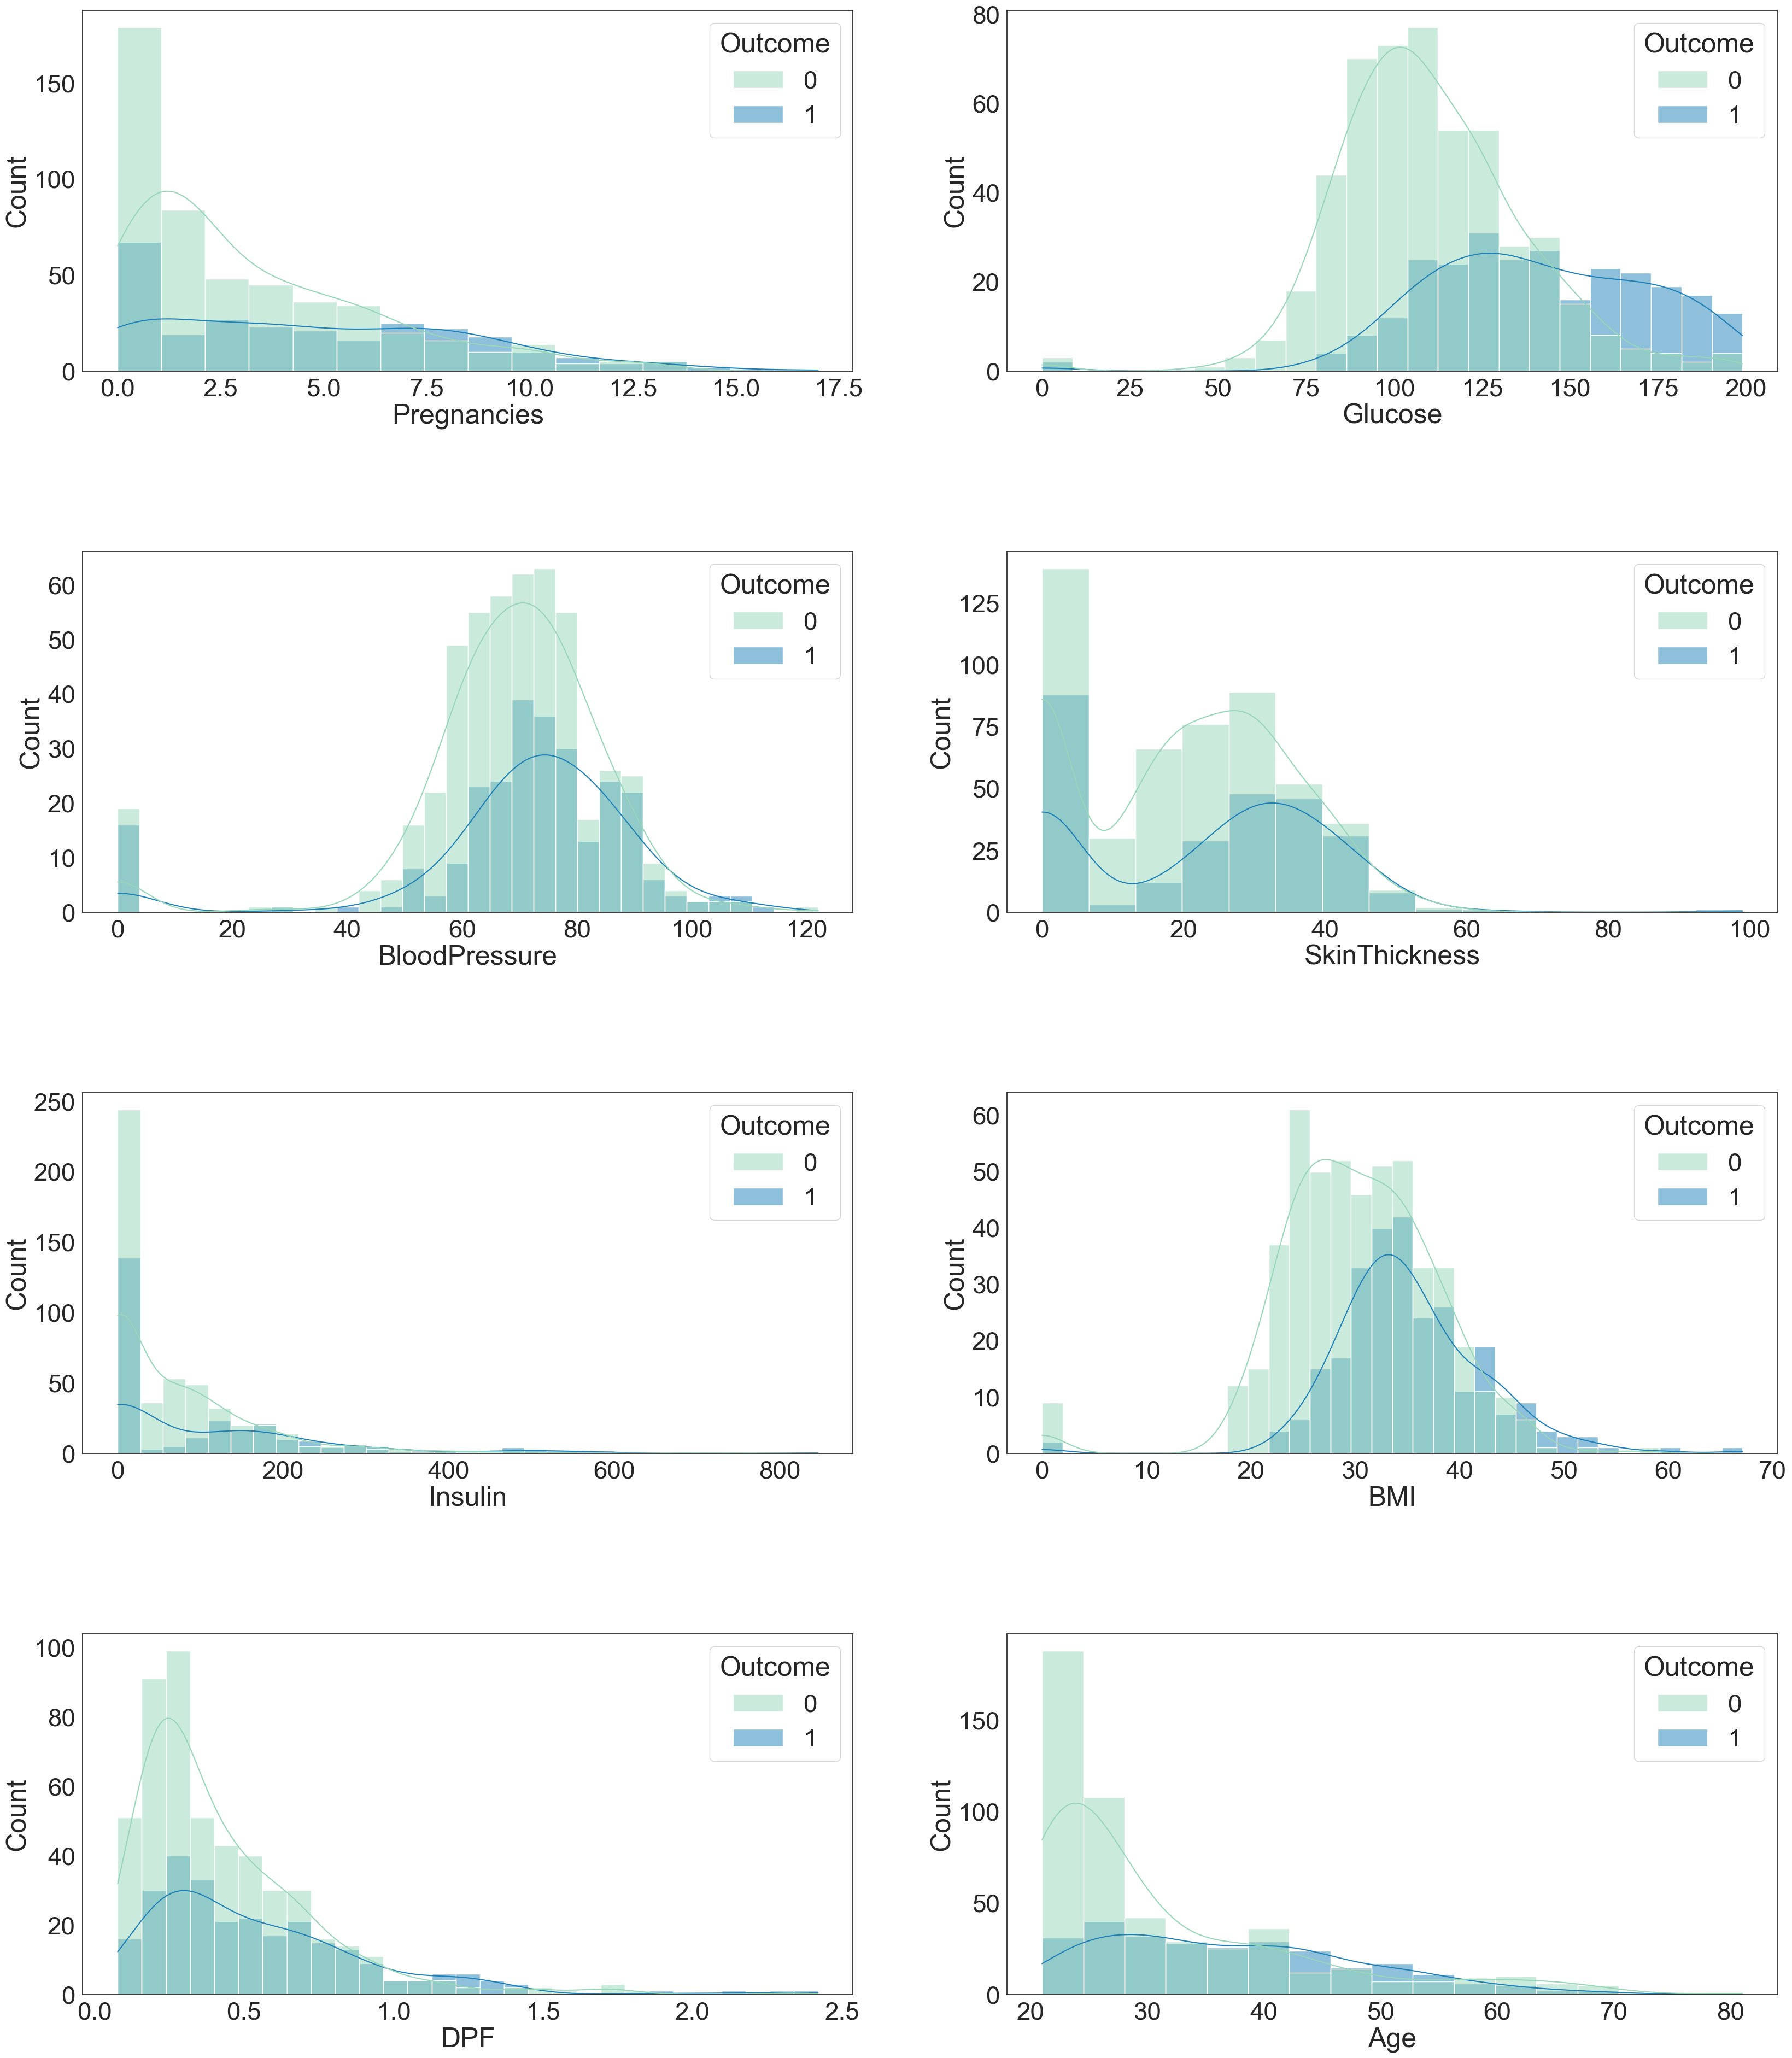

In [13]:
feature_names = [cname for cname in diabetes_df.loc[:,:'Age'].columns]
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

In [11]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

diabetes_df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

<h3> Removing the zero from the relation</h3>
<p> From the distributions, we find that some of highlighted columns are being skewed because of zeros so, instead of zeros we are going to impute those zeros to means.</p>

In [15]:
zero_features = ['Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


In [16]:
diabetes_mean = diabetes_df[zero_features].mean()
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0, diabetes_mean)

In [23]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

X_train.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

<h1>Creating a utility function as a performance measure</h1>
<p>The utility function will print the accuracy, precision, recall and f-1 scores of various models upto 4 decimal places.</p>

In [18]:
#Utlility Functions
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)   
     
    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion

In [21]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_scaled = scaler.fit_transform(X)

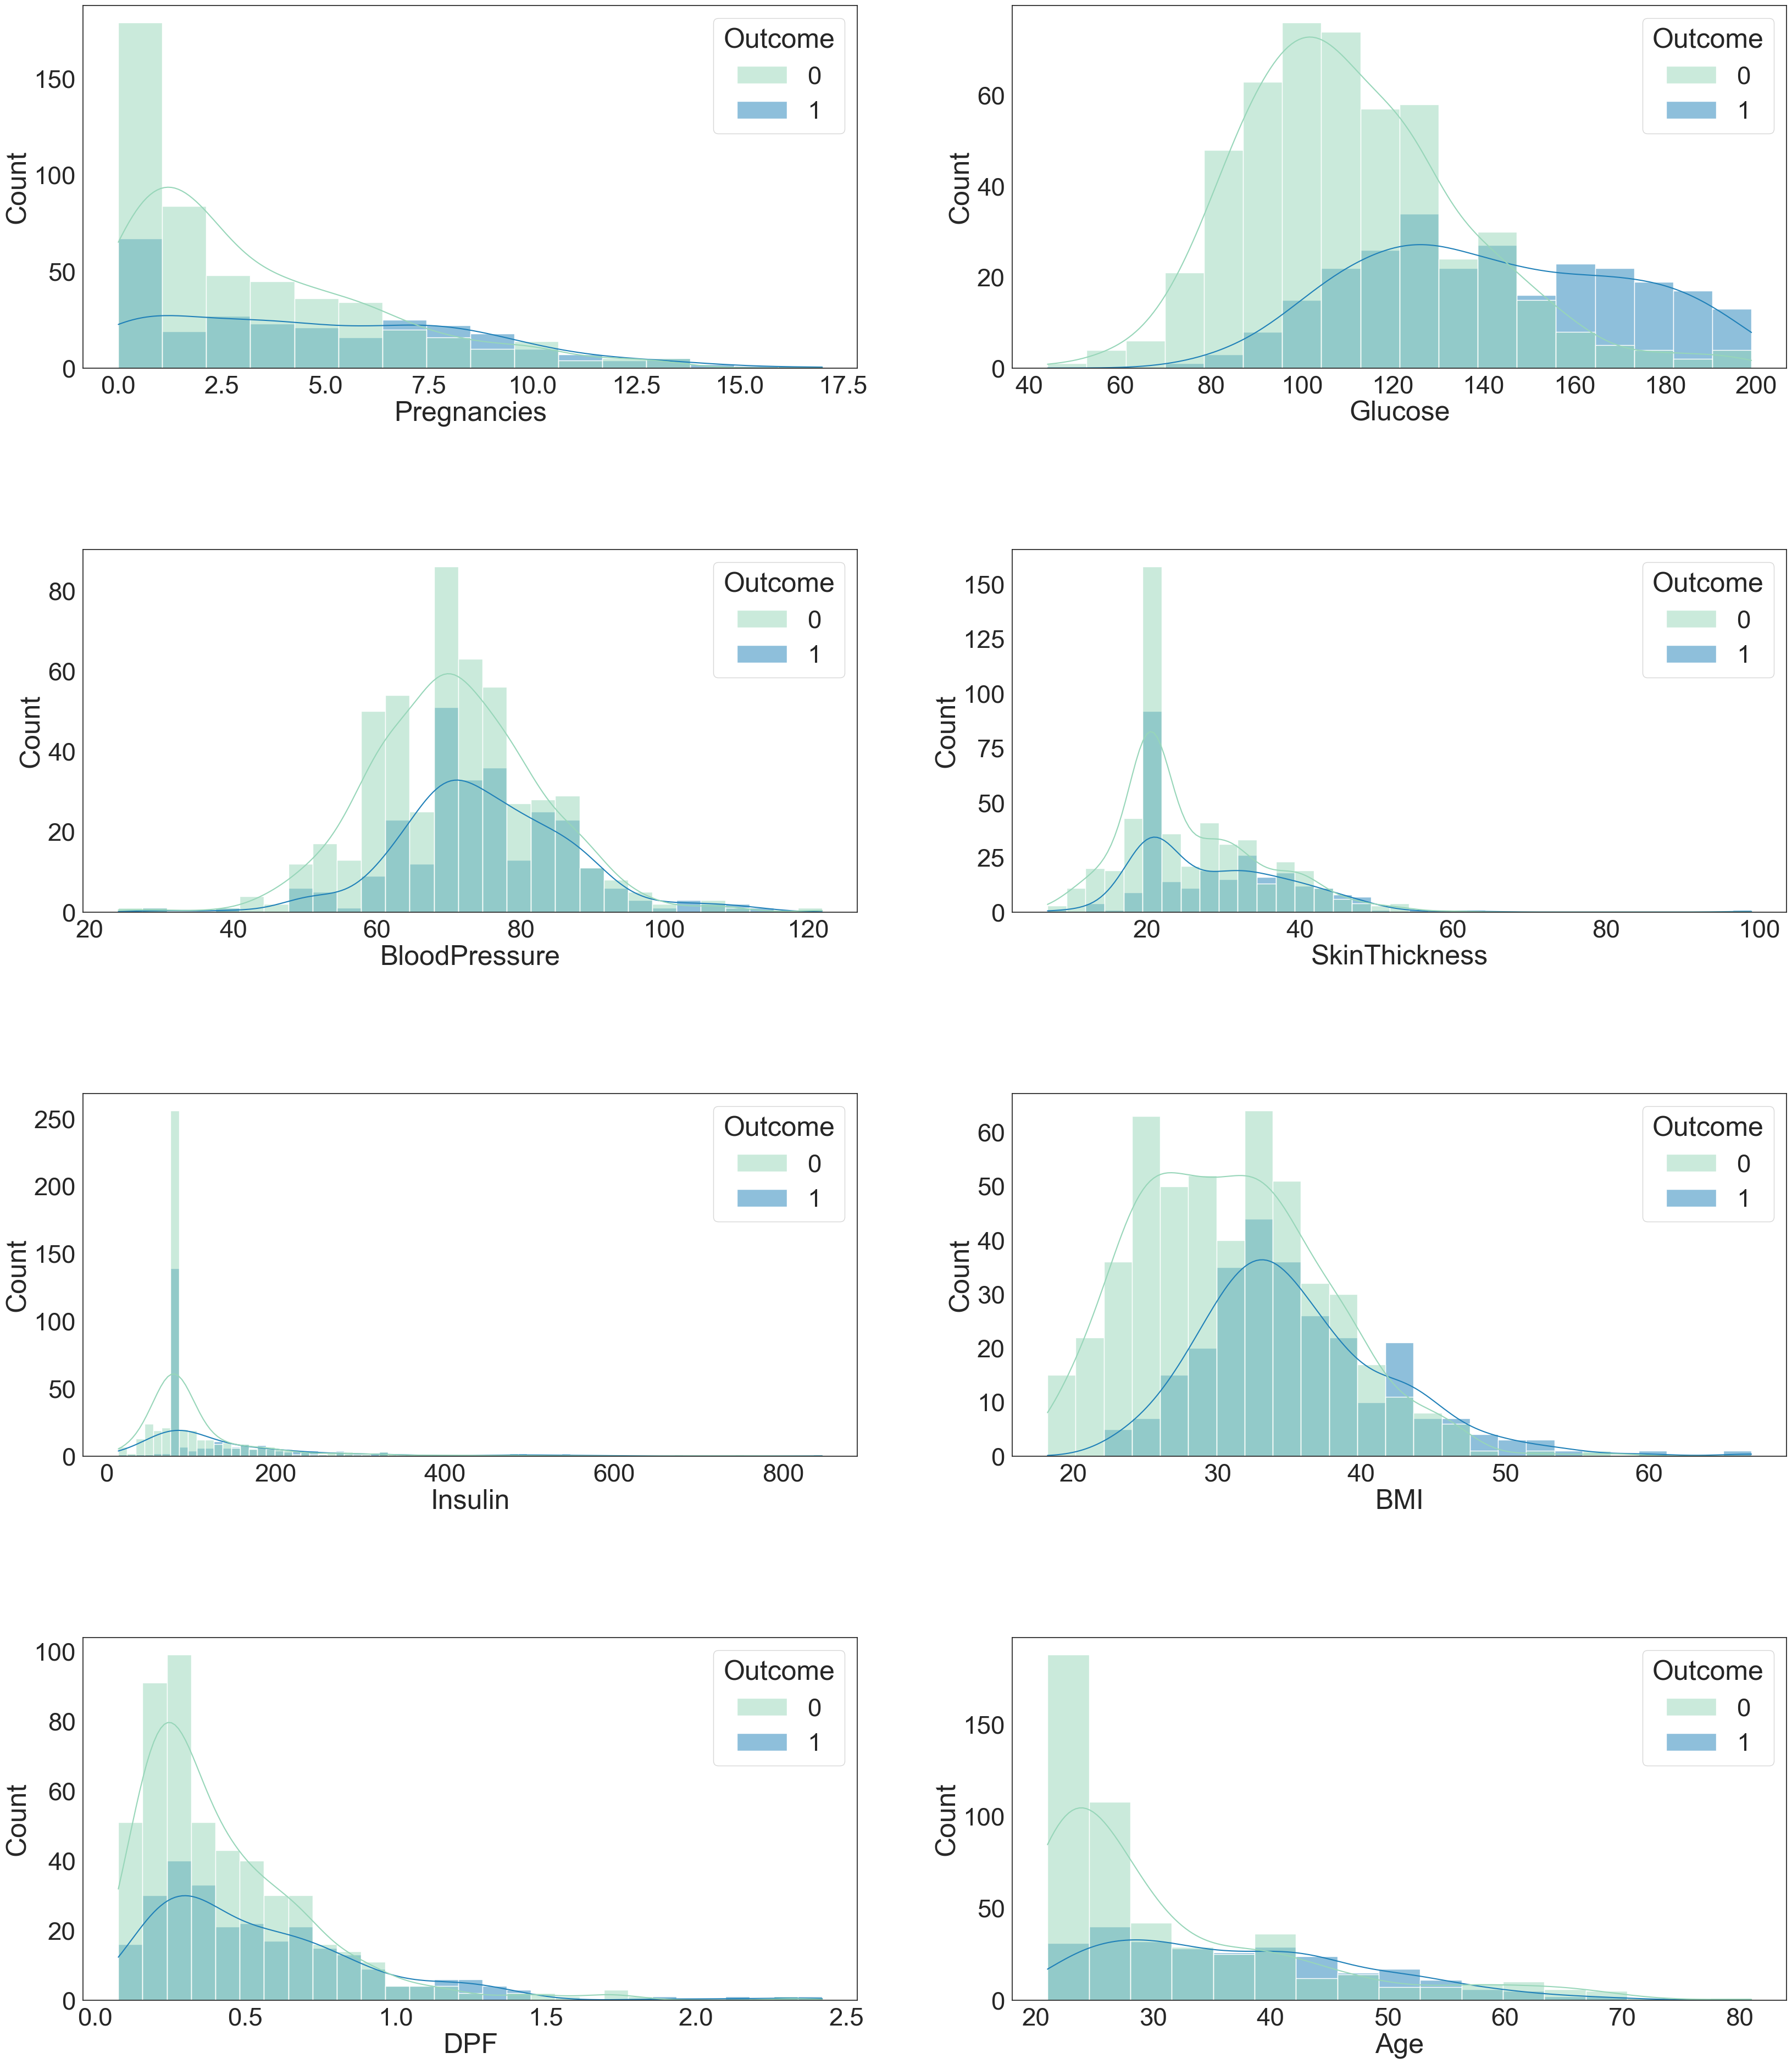

In [24]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

In [20]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

<h3>Checking the correlation of the features</h3>
<p>To check the relationship between the parameters and find the most likely parameters that will play a major role.</p>

Text(0.5, 1.0, 'Correlation Plot')

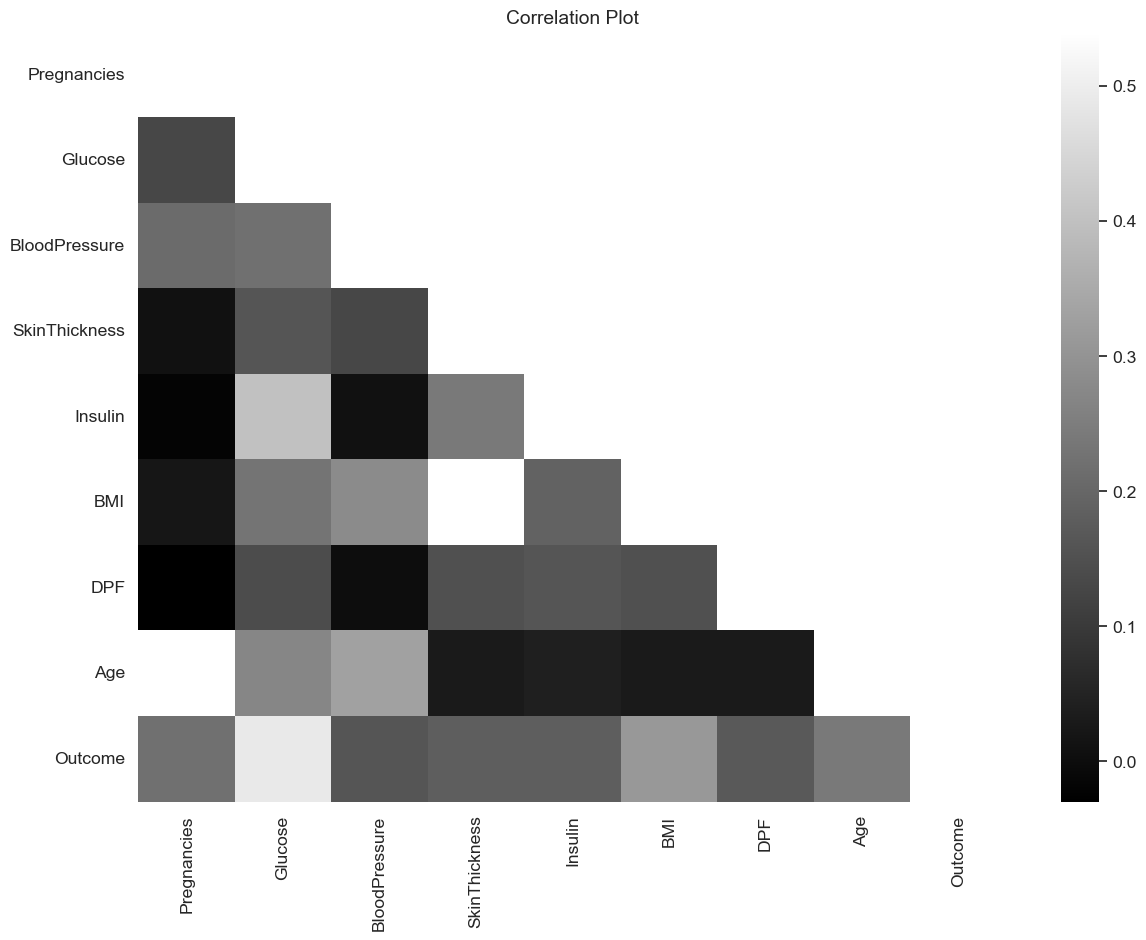

In [26]:
corr=diabetes_df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

<Figure size 1000x800 with 0 Axes>

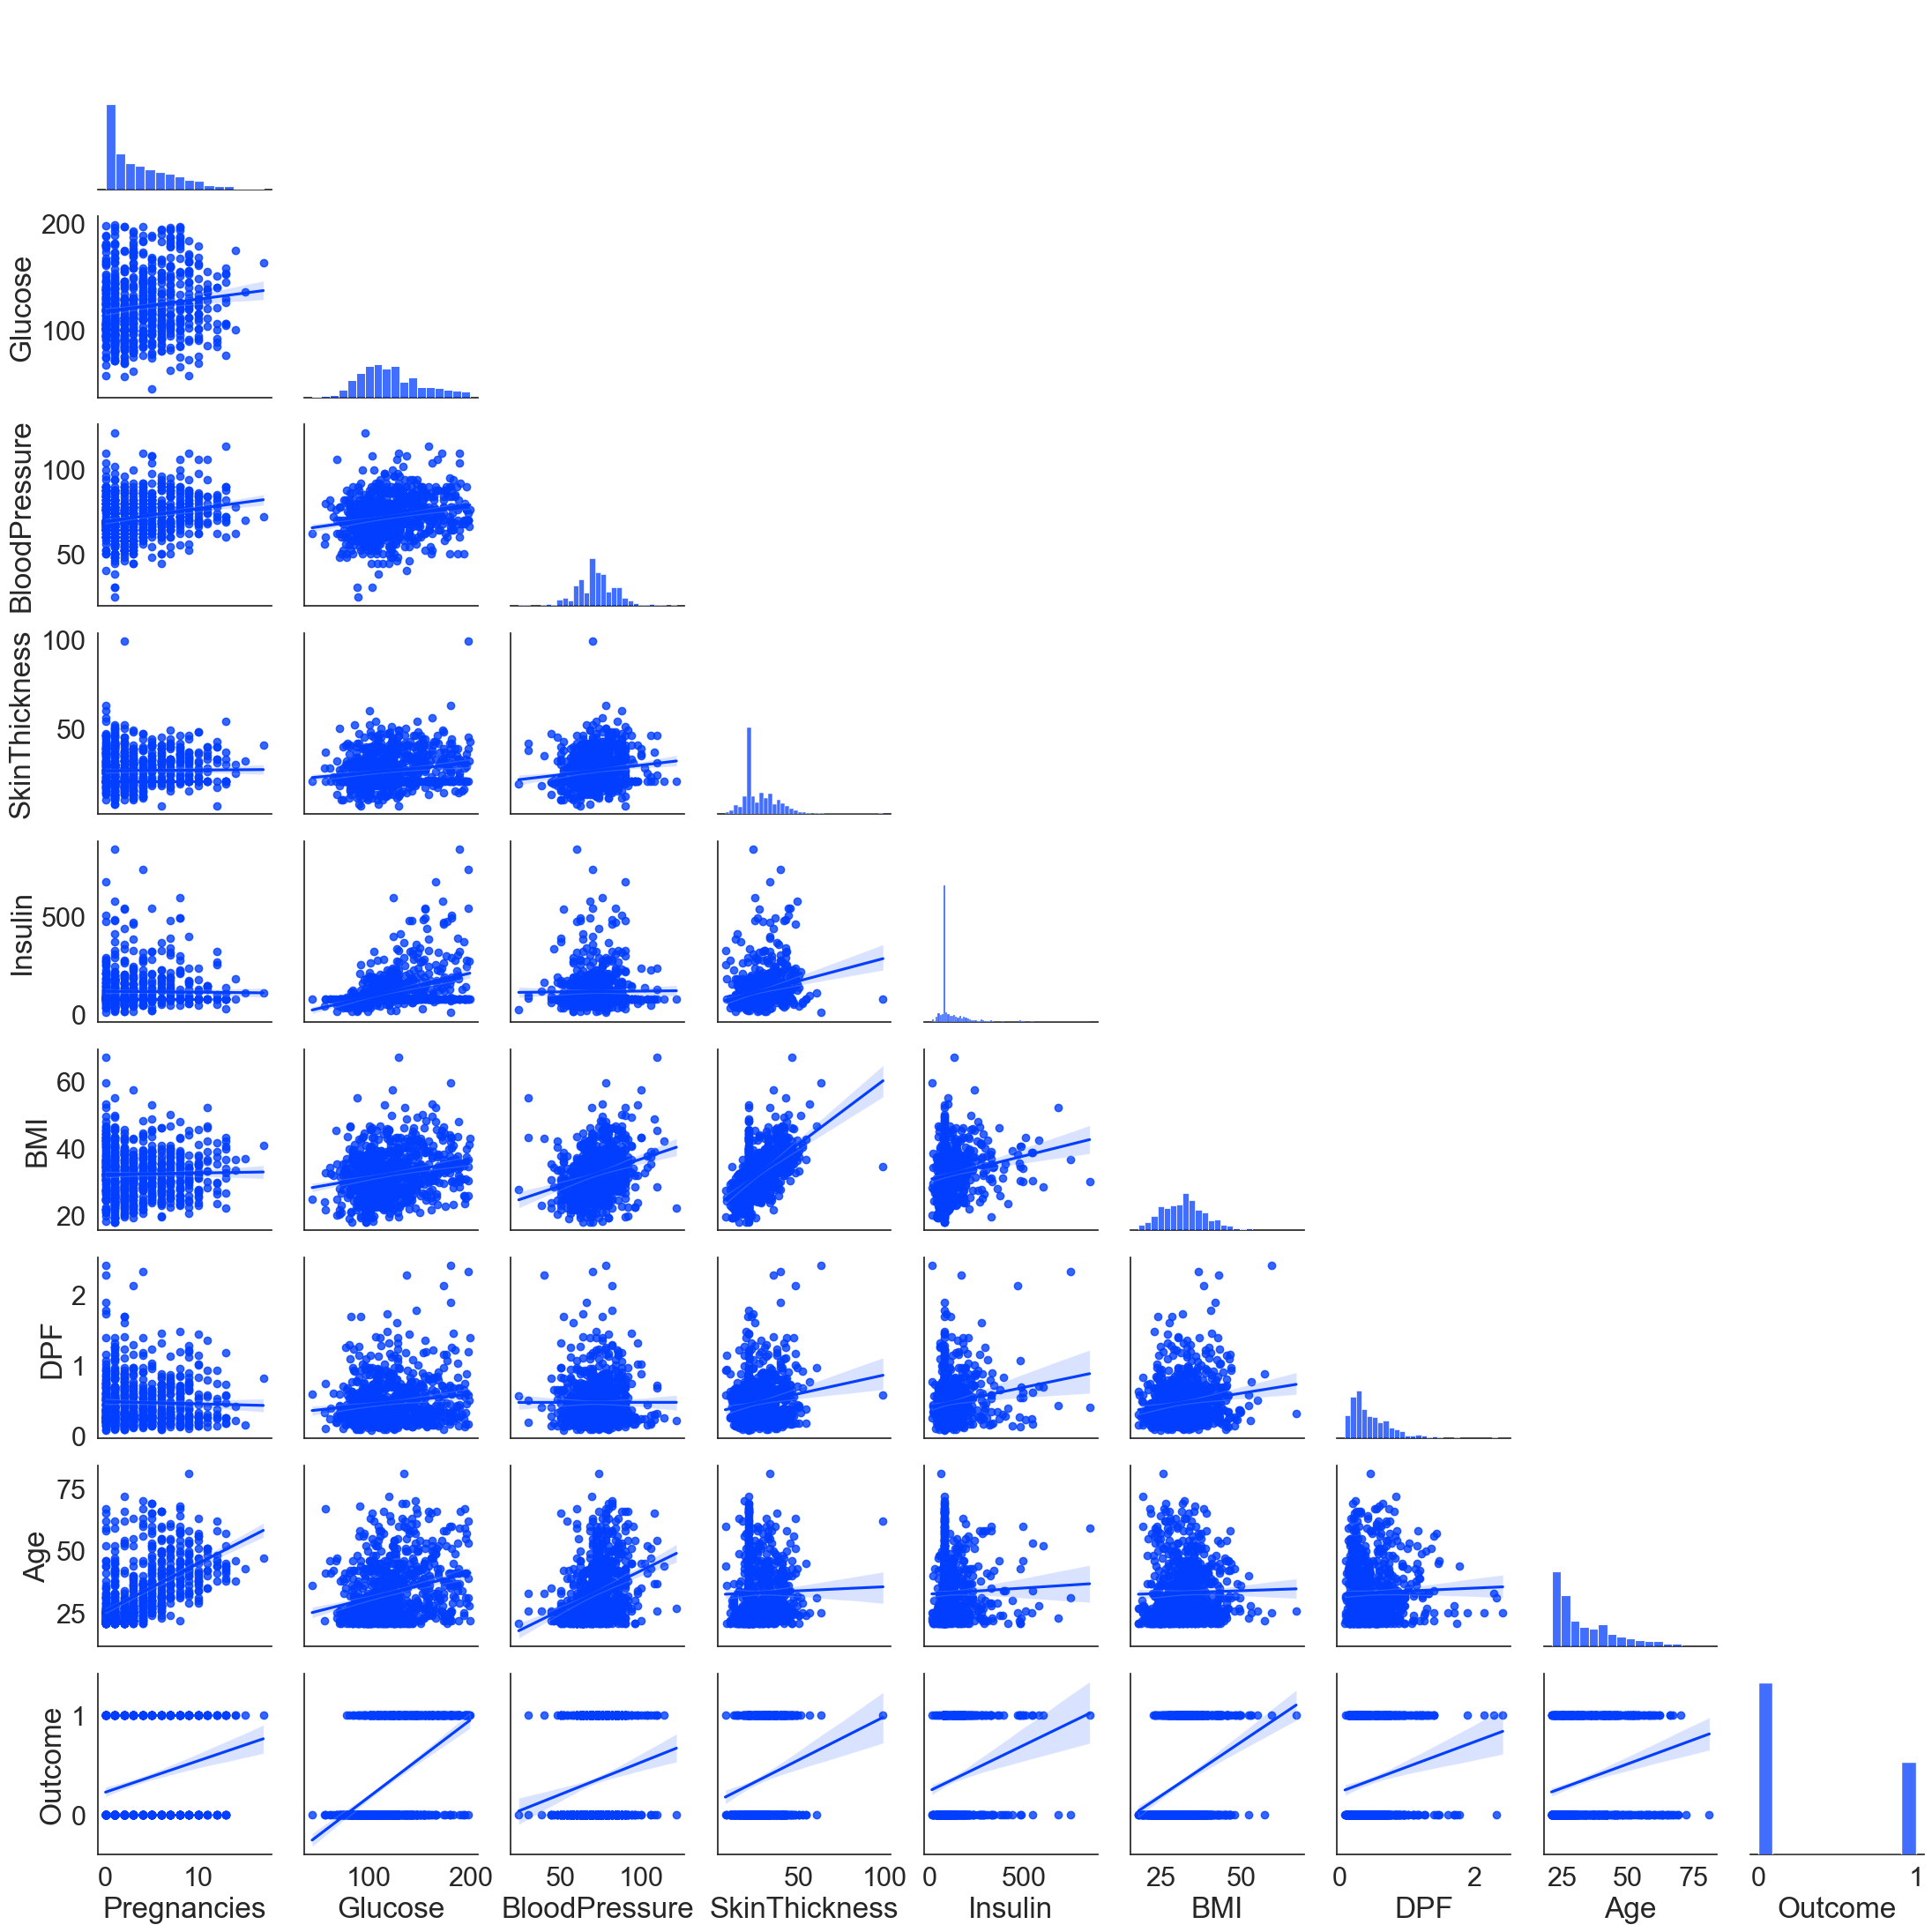

In [27]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(diabetes_df,kind = 'reg',corner = True,palette ='YlGnBu' )

<h1>Splitting the data into Train and Test Splits</h1>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10000)

<h3>Converting the dataset into a model</h3>

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')


# 1. Split data into features (X) and target variable (y)
X = diabetes_df.drop('Outcome', axis=1)  # Assuming 'Outcome' is your target column
y = diabetes_df['Outcome']

# 2. Split data into training and testing sets (optional)|
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Apply preprocessing (optional)
scaler = StandardScaler()  # Assuming you want standardization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [34]:
print(len(X_train_scaled))
print(len(X_test_scaled))

614
154


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [36]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

In [37]:
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    pred = clf.predict(X_test_scaled)
    pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
    print(f"Results for {clf_name}:")
    get_clf_eval(y_test, pred, pred_proba)
    print("\n" + "-"*50 + "\n")

Results for Logistic Regression:
accuracy: 0.7662, precision: 0.6863, recall: 0.6364,    F1: 0.6604, AUC:0.8220

--------------------------------------------------

Results for Decision Tree:
accuracy: 0.7273, precision: 0.5942, recall: 0.7455,    F1: 0.6613, AUC:0.7313

--------------------------------------------------

Results for Random Forest:
accuracy: 0.7662, precision: 0.6727, recall: 0.6727,    F1: 0.6727, AUC:0.8280

--------------------------------------------------

Results for AdaBoost:
accuracy: 0.7403, precision: 0.6316, recall: 0.6545,    F1: 0.6429, AUC:0.8046

--------------------------------------------------

Results for SVM:
accuracy: 0.7338, precision: 0.6458, recall: 0.5636,    F1: 0.6019, AUC:0.8066

--------------------------------------------------

Results for KNN:
accuracy: 0.7662, precision: 0.6610, recall: 0.7091,    F1: 0.6842, AUC:0.8057

--------------------------------------------------

Results for Gradient Boost:
accuracy: 0.7662, precision: 0.6557, 

<h2>Ensembling the models - Mixing and Matching up together</h2>

<h3>Soft Voting</h3>

<p>Soft voting is an ensemble learning technique used for classification tasks. It combines the predictions from multiple individual models by averaging their predicted probabilities for each class. The class with the highest average probability is then considered the final prediction of the ensemble model.</p>

<h5>Benefits:</h5>
<ul>
<li>Improved Accuracy: Soft voting can often lead to more accurate predictions compared to individual models by leveraging the collective knowledge of the ensemble.</li>
<li>Reduced Variance: By averaging predictions, soft voting helps to reduce the variance of individual models, leading to more robust results.</li>
</ul>


In [39]:
from sklearn.ensemble import VotingClassifier

ensemble_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('ada', AdaBoostClassifier()),
        ('lda', LinearDiscriminantAnalysis())
        
    ],
    voting='soft'
)

In [40]:
ensemble_clf.fit(X_train_scaled, y_train)
ensemble_pred = ensemble_clf.predict(X_test_scaled)
ensemble_pred_proba = ensemble_clf.predict_proba(X_test_scaled)[:, 1]

In [41]:

print("Results for Ensemble Model:")
get_clf_eval(y_test, ensemble_pred, ensemble_pred_proba)

Results for Ensemble Model:
accuracy: 0.7727, precision: 0.7000, recall: 0.6364,    F1: 0.6667, AUC:0.8340


array([[84, 15],
       [20, 35]], dtype=int64)

In [42]:
ensemble_clf2 = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svm', SVC(probability=True)),
        ('gb', GradientBoostingClassifier()),
        ('ada', AdaBoostClassifier()),
        ('lda', LinearDiscriminantAnalysis())
    ],
    voting='soft'
)

In [43]:
ensemble_clf2.fit(X_train_scaled, y_train)
ensemble_pred = ensemble_clf2.predict(X_test_scaled)
ensemble_pred_proba = ensemble_clf2.predict_proba(X_test_scaled)[:, 1]

In [44]:
print("Results for Ensemble Model:")
get_clf_eval(y_test, ensemble_pred, ensemble_pred_proba)

Results for Ensemble Model:
accuracy: 0.7662, precision: 0.6792, recall: 0.6545,    F1: 0.6667, AUC:0.8351


array([[82, 17],
       [19, 36]], dtype=int64)

<h3>Stacking</h3>
<p>Stacking, also known as stacked generalization, is a two-stage ensemble learning technique for classification and regression tasks. It involves training a meta-model on top of a set of base models. The base models are trained on the original dataset, and their predictions are used as new features for the meta-model. The meta-model then learns to combine these features and make the final prediction</p>

<h5>Benefits:</h5>
<ul>
<li>Improved Performance: Stacking can often outperform individual models by allowing the meta-model to learn from the strengths and weaknesses of the base learners.</li>
<li>Flexibility: Different base models can be used, promoting diversity and potentially leading to better generalization.</li>
</ul>

In [46]:
base_classifiers = [
    ('lr', LogisticRegression()),
    ('ada', AdaBoostClassifier()),
    ('svm', SVC(probability=True)),
    ('lda', LinearDiscriminantAnalysis())
]

In [47]:
meta_classifier = LogisticRegression()

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    stack_method='predict_proba'
)

In [48]:
# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('ada', AdaBoostClassifier()),
                               ('svm', SVC(probability=True)),
                               ('lda', LinearDiscriminantAnalysis())],
                   final_estimator=LogisticRegression(),
                   stack_method='predict_proba')

In [49]:
# Predictions and evaluation
stacking_pred = stacking_clf.predict(X_test_scaled)
stacking_pred_proba = stacking_clf.predict_proba(X_test_scaled)[:, 1]

In [50]:
print("Results for Stacking Model:")
get_clf_eval(y_test, stacking_pred, stacking_pred_proba)

Results for Stacking Model:
accuracy: 0.7727, precision: 0.7000, recall: 0.6364,    F1: 0.6667, AUC:0.8264


array([[84, 15],
       [20, 35]], dtype=int64)

<h1>Tuning the Hyperparameters</h1>
<p>Hyperparameter tuning is the process of optimizing the performance of a machine learning model by adjusting its hyperparameters. Hyperparameters are settings that control the learning process of the model itself, as opposed to the model's coefficients or weights learned during training.Eventually, this optmises the model to enable better performances.</p>

In [52]:
param_grids = {
    'lr': {'C': [0.00001,0.0001,0.001,0.01,0.1, 1, 10]},
    'rf': {'n_estimators': [50, 100, 200, 250], 'max_depth': [None, 5, 10, 20]},
    'ada': {'n_estimators': [50, 75, 100, 125], 'learning_rate': [0.00001,0.0001,0.001,0.01, 0.1, 1]},
    'gb': {'n_estimators': [50, 75, 100, 125], 'learning_rate': [0.01, 0.1, 0.5]},
    'svm': {'C': [0.00001,0.0001,0.001,0.01,0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'knn': {'n_neighbors': [3, 5, 7]},
    'lda': {'solver': ['svd', 'lsqr', 'eigen']}
}

In [53]:
base_classifiers = []

for clf_name, clf in [
    ('lr', LogisticRegression()),
    ('ada', AdaBoostClassifier()),
    ('svm', SVC(probability=True)),
    ('lda', LinearDiscriminantAnalysis())
]:
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    base_classifiers.append((clf_name, grid_search.best_estimator_))

Best parameters for lr: {'C': 1}
Best parameters for ada: {'learning_rate': 0.1, 'n_estimators': 75}
Best parameters for svm: {'C': 1, 'kernel': 'rbf'}
Best parameters for lda: {'solver': 'svd'}


In [54]:
# Meta-classifier
meta_classifier = LogisticRegression()

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    stack_method='predict_proba'
)


In [55]:
stacking_clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(C=1)),
                               ('ada',
                                AdaBoostClassifier(learning_rate=0.1,
                                                   n_estimators=75)),
                               ('svm', SVC(C=1, probability=True)),
                               ('lda', LinearDiscriminantAnalysis())],
                   final_estimator=LogisticRegression(),
                   stack_method='predict_proba')

In [56]:
stacking_pred = stacking_clf.predict(X_test_scaled)
stacking_pred_proba = stacking_clf.predict_proba(X_test_scaled)[:, 1]

print("Results for Stacking Model:")
results=get_clf_eval(y_test, stacking_pred, stacking_pred_proba)
results

Results for Stacking Model:
accuracy: 0.7727, precision: 0.7000, recall: 0.6364,    F1: 0.6667, AUC:0.8272


array([[84, 15],
       [20, 35]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix (Stacking)')

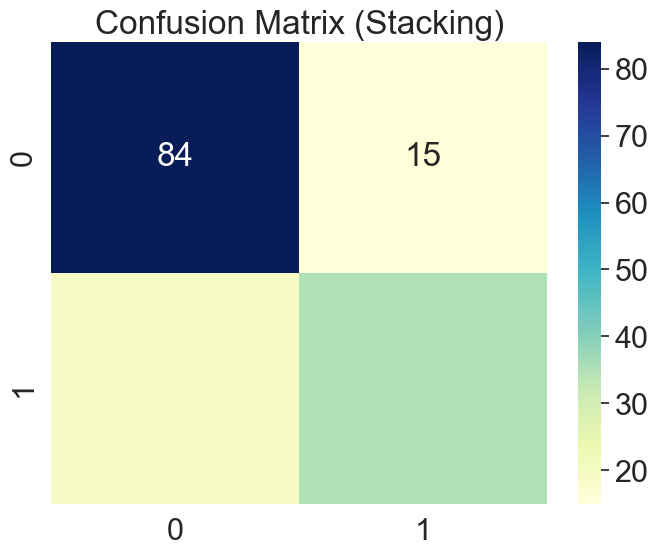

In [57]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(results, cmap = 'YlGnBu', annot=True)
ax.set_title('Confusion Matrix (Stacking)')

<h3>Conclusion</h3>
<p>Compared to individual models we find the voting model and the stacking model has almost the same amount of performance. As this was binary classification naturally logistic regression, linear discriminant analysis, ada boost classifier and support vector machine has performed well. The overall accuracy is 77% which is optimal for a small amount of training data given. We can scale this model with more inputs and increase it's accuracy and leverage this as a prediction system.</p>